# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [3]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [4]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Bjorn\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [5]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [6]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

In [7]:
#TODO: visualiser y_train og y_test i et histogram

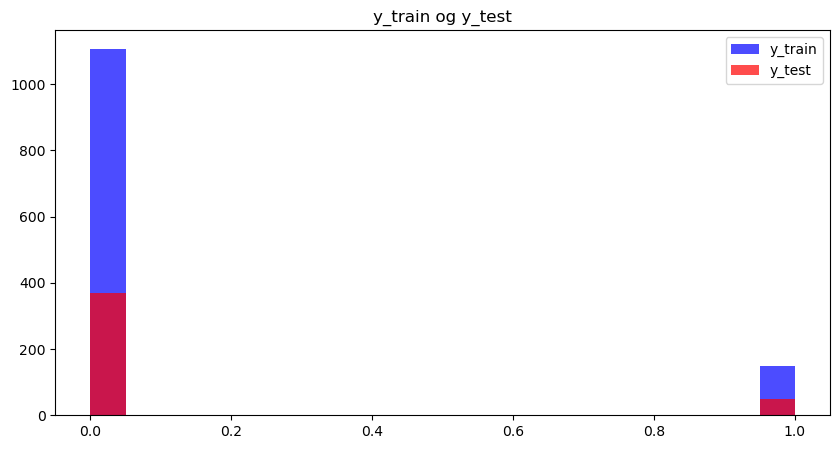

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=20, color='blue', alpha=0.7, label='y_train')
plt.hist(y_test, bins=20, color='red', alpha=0.7, label='y_test')
plt.title('y_train og y_test')
plt.legend()
plt.show()


**Svar:**

Man ser ut i fra historgrammet at trenings dataen og test dataen kun inneholder verdiene 0 og 1 noe som vil si at en Logistisk regresjons model kan egne seg godt.

<span style='color:red '>Target er en binær variabel og derfor er det er klassifiseringsproblem, og som du sier så kan logistisk regresjon (men også andre klassifiseringsmodeller) brukes.  </span>

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


In [9]:
#TODO: repeterte kryssvalideringer for to modeller

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
n_repeats = 10
n_splits = 5

models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]

f1_scores_model1 = []
f1_scores_model2 = []

for model in models:
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
    f1_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='f1')
    if model == models[0]:
        f1_scores_model1 = f1_scores
    else:
        f1_scores_model2 = f1_scores

t_stat, p_value = stats.ttest_rel(f1_scores_model1, f1_scores_model2)



C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

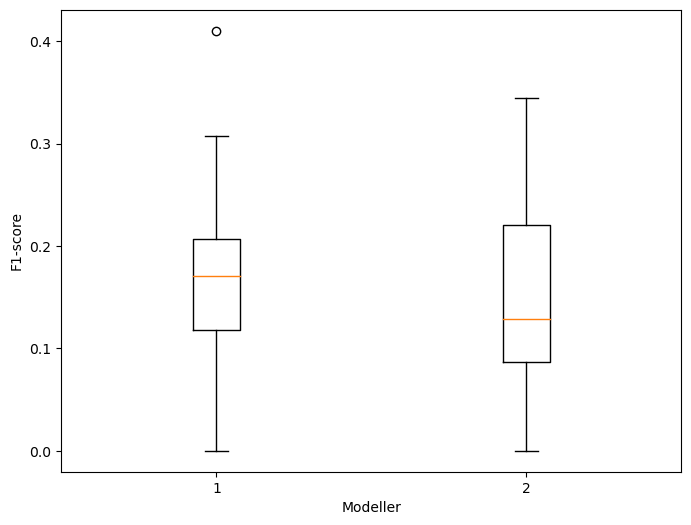

T-Stat: 1.2555, P-Value: 0.2152
Model 1 er best.


NameError: name 'avg_accuracy_score_model1' is not defined

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot([f1_scores_model1, f1_scores_model2])
plt.xlabel('Modeller')
plt.ylabel('F1-score')
plt.show()

print(f"T-Stat: {t_stat:.4f}, P-Value: {p_value:.4f}")

avg_f1_score_model1 = np.mean(f1_scores_model1)
avg_f1_score_model2 = np.mean(f1_scores_model2)
#avg_accuracy_score_model1 = np.mean(accuracy_scores_model1)
#avg_accuracy_score_model2 = np.mean(accuracy_scores_model2)

if avg_f1_score_model1 > avg_f1_score_model2:
    print("Model 1 er best.")
elif avg_f1_score_model2 > avg_f1_score_model1:
    print("Model 2 er best.")
else:
    print("Model 1 og Model 2 har samme ytelse.")
    
print(f"Model 1 - Gjennomsnittlig F1-score: {avg_f1_score_model1}, Gjennomsnittlig accuracy-score: {avg_accuracy_score_model1}")
print(f"Model 2 - Gjennomsnittlig F1-score: {avg_f1_score_model2}, Gjennomsnittlig accuracy-score: {avg_accuracy_score_model2}")


Vi ser ut i fra box plottet at Model 1 har en høyere gjennomsnittelig F1 score en det model 2 har. Dette vil si at Logistisk regrejsnons modellen gjør det bedre en random forest modellen.
Men det er ikke mye som skiller modellene når det kommer til gjennomsnittlig f1-score noe som igjen vil si at modellen er nesten like gode prestasjon, men modell 2 har høyere presisjon en model 1 da gjennomsnittelig accuraccy score er 0.885 på model 2 og noe lavere med 0.694 på model1.

<span style='color:red '> Bra jobbet, men jeg får noen errors i forbindelse med accuracy-metrikkene. Viktig å teste at koden er replikerbar. Jeg får at P-verdien er >0.05 og derfor kan vi ikke si om det er en signifikant eller tilfeldig forskjell mellom de to modellene </span>

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [17]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

In [18]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

n_repeats = 10
n_splits = 5
smote = SMOTE(sampling_strategy='auto', random_state=0)  # Opprett SMOTE-instans

models = [LogisticRegression(), RandomForestClassifier()]

f1_scores_model1 = []
f1_scores_model2 = []
accuracy_scores_model1 = []
accuracy_scores_model2 = []

for model in models:
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
    f1_scores = []
    accuracy_scores = []

    for train_idx, test_idx in rkf.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_train_resampled, y_train_resampled)

        f1 = f1_score(y_test_cv, model.predict(X_test_cv))
        accuracy = accuracy_score(y_test_cv, model.predict(X_test_cv))
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    if model == models[0]:
        f1_scores_model1 = f1_scores
        accuracy_scores_model1 = accuracy_scores
    else:
        f1_scores_model2 = f1_scores
        accuracy_scores_model2 = accuracy_scores

avg_f1_score_model1 = np.mean(f1_scores_model1)
avg_f1_score_model2 = np.mean(f1_scores_model2)
avg_accuracy_score_model1 = np.mean(accuracy_scores_model1)
avg_accuracy_score_model2 = np.mean(accuracy_scores_model2)



C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

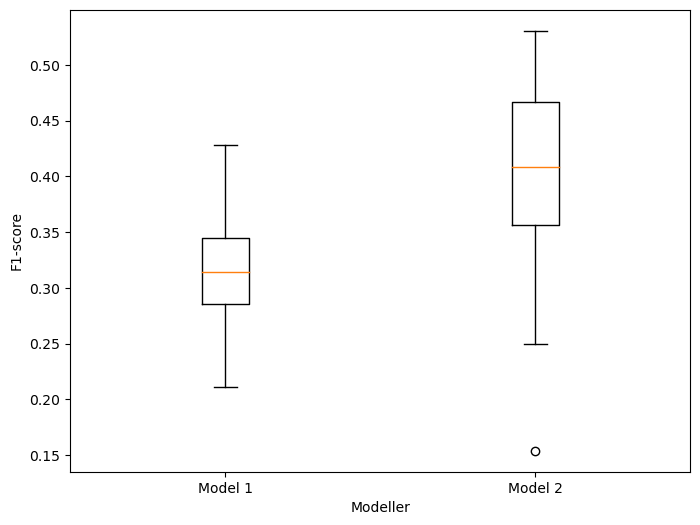

In [19]:
import matplotlib.pyplot as plt
import numpy as np
##Dersom model 1 ikke blir til en box ved kjøring, kjør modellen på nytt og plott igjen. Har ikke funnet ut hvorfor denne feilen oppstår
f1_scores = [f1_scores_model1, f1_scores_model2]
model_names = ['Model 1', 'Model 2']

plt.figure(figsize=(8, 6))
plt.boxplot(f1_scores)
plt.xticks(range(1, len(model_names) + 1), model_names)
plt.xlabel('Modeller')
plt.ylabel('F1-score')
plt.show()

In [20]:
print(f"T-Stat: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Model 1 - Gjennomsnittlig F1-score: {avg_f1_score_model1}, Gjennomsnittlig accuracy-score: {avg_accuracy_score_model1}")
print(f"Model 2 - Gjennomsnittlig F1-score: {avg_f1_score_model2}, Gjennomsnittlig accuracy-score: {avg_accuracy_score_model2}")


avg_f1_score_model1 = sum(f1_scores_model1) / len(f1_scores_model1)
avg_f1_score_model2 = sum(f1_scores_model2) / len(f1_scores_model2)

if avg_f1_score_model1 > avg_f1_score_model2:
    print("Model 1 er best.")
elif avg_f1_score_model2 > avg_f1_score_model1:
    print("Model 2 er best.")
else:
    print("Model 1 og Model 2 har samme ytelse.")

T-Stat: 1.2555130185713057
P-Value: 0.21524688519539828
Model 1 - Gjennomsnittlig F1-score: 0.31889013506560504, Gjennomsnittlig accuracy-score: 0.6946708404477329
Model 2 - Gjennomsnittlig F1-score: 0.40015667069175026, Gjennomsnittlig accuracy-score: 0.8855223550243472
Model 2 er best.


Resultatene etter trening på et balansert datasett viser at Model 2 nå er en bedre modell enn Model 1 i henhold til både F1-score og accuracy-score. T-Stat og den lave P-Verdien viser også at forskjellen i ytelse mellom de to modellene er signifikant.

Men det er verdt å merke seg at model 2 har en større spredning i f1 scoren (ligger mellom 0.3 til ca 0.6) enn det model 1 har noe som kan tyde på at ytelsen til model 2 er mer variabel.

Det er verdt å merke seg at resultatene er forbedret med tanke på resultatene i 2.2
Gjennomsnittelig presisjon er den samme, men gjennomsnittelig F1 score har gått opp for begge modellene størst oppgang er for model 2 der f1 scoren går fra 0.153 til 0.388. Det er nå også en større forskjell i f1 score mellom modellen en i 2.2

<span style='color:red '> Godt jobbet, men du har glemt å beregne ny P-verdi og derfor rapporterer du P-verdien fra forrige oppgave. Ved å se på box-plottet vil jeg forvente en lavere P-verdi og sannsynligvis også signifikant forskjell mellom de to modellene.
  
</span>

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [21]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np

n_repeats = 10
n_splits = 5

smote = SMOTE(sampling_strategy='auto', random_state=0)
models = [LogisticRegression(), RandomForestClassifier()]

f1_scores_model1 = []
f1_scores_model2 = []

for model in models:
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
    f1_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='f1')
    
    if model == models[0]:
        f1_scores_model1 = f1_scores
    else:
        f1_scores_model2 = f1_scores

avg_f1_score_model1 = np.mean(f1_scores_model1)
avg_f1_score_model2 = np.mean(f1_scores_model2)

best_model = None

if avg_f1_score_model1 > avg_f1_score_model2:
    best_model = models[0]
else:
    best_model = models[1]

from sklearn.metrics import confusion_matrix, classification_report


best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print("Sensitivitet:", sensitivity)
print("Spesifisitet:", specificity)
print("Presisjon:", precision)
print("F1-score:", f1)
print("Nøyaktighet:", accuracy)


Sensitivitet: 0.02
Spesifisitet: 0.9891891891891892
Presisjon: 0.2
F1-score: 0.03636363636363636
Nøyaktighet: 0.8738095238095238


<span style='color:red '> Her definerer du SMOTE, men glemmer å bruke den til å oppsample treningsdataene. Det ville sannsynligvis økt ytelsen til noe tilsvarende det vi så på kryssvalideringen. Et pluss at du skriver formlene for de ulike metrikkene selv!
</span>

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [25]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
num_samples = len(X_test)
print("Total number of samples in X_test:", num_samples)


male_mask = X_test['Gender'] == 0
female_mask = X_test['Gender'] == 1

male_test_set = X_test.loc[male_mask]
female_test_set = X_test.loc[female_mask]

num_male_samples = len(male_test_set)
num_female_samples = len(female_test_set)

print("Number of Male samples in X_test:", num_male_samples)
print("Number of Female samples in X_test:", num_female_samples)


Total number of samples in X_test: 420
Number of Male samples in X_test: 253
Number of Female samples in X_test: 167


In [26]:
male_y_true = male_test_set['Gender'].values
male_y_pred = y_pred[male_mask]

male_sensitivity = recall_score(male_y_true, male_y_pred)
male_specificity = precision_score(male_y_true, male_y_pred)
male_precision = accuracy_score(male_y_true, male_y_pred)

female_y_true = female_test_set['Gender'].values  
female_y_pred = y_pred[female_mask]
female_sensitivity = recall_score(female_y_true, female_y_pred)
female_specificity = precision_score(female_y_true, female_y_pred)
female_precision = accuracy_score(female_y_true, female_y_pred)

print("For Men:")
print("Sensitivity:", male_sensitivity)
print("Specificity:", male_specificity)
print("Precision:", male_precision)

print("For Women:")
print("Sensitivity:", female_sensitivity)
print("Specificity:", female_specificity)
print("Precision:", female_precision)

For Men:
Sensitivity: 0.0
Specificity: 0.0
Precision: 0.9841897233201581
For Women:
Sensitivity: 0.005988023952095809
Specificity: 1.0
Precision: 0.005988023952095809


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Er modellen like god for begge kjønn?
- Jeg vil si at modellen er like "dårlig" på begge kjønn da den for menn har en sesnsitiviet på 0 og for kvinner har en sensitivitet på 0.012 noe som også ikke er et godt resultatt. Dette vil si at modellen sliter med å oppdage sanne positive tilfeller.
- Modellen scorer også lavt når det kommer til å identifisere negative tilfeller for menn, noe som vil si at alle blir feilaktig klassifisert. Mens for kvinner fungerer modellen bedre da den klarer å identifisere alle negative tilfeller riktig.
- Jeg vil derfor si at modellen egner seg bedre for kvinner en for menn.
Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen?
- Modellen er ikke like god for begge kjønn og som beskrevet over har en betydelige problemer med å identifisere positive tilfeller og feiler også når det kommer til å identifisere negative tilfeller for menn. Dette kan tyde på at modellen ikke er rettferdig ovenfor begge kjønn.

Tiltakk som jeg ville implementert dersom jeg skulle jobbet videre med oppgaven:
- Velg en annen modell, jeg ville nok valgt en annen modell å gå videre med en random forest. Det er mulig at Logistisk regresjon alikevell ville vært bedre dersom den hadde blitt bedre tunet.
- Jeg ville også undersøkt om det er skjevheter i datasettet
- Det kunne også vært interessant å utforsket tuning av random forest modellen for å se om det gikk ann å få resultatet noe bedre, men jeg konkluderer likevell med at modellen fra starten av burde vært en annen.
- Det er mulig den variable bredden i prestasjon i model 2 har gjort at modellen ikke presterer godt nok. Jeg observerte også fra starten av at det var gjevnt mellom model 1 og 2 noe som kan indikere at ingen av modellene egnet seg særlig godt til datasettet og at jeg burde valgt 2 helt andre modeller. 
- Decision Tree classifier kunne vært et interessant alternativ å prøvd, men det er ikke sikkert denne hadde egnet seg noe bedre

<span style='color:red '> Ja, her fikk du ikke den effekten jeg hadde håpet på. Dessverre ble modellen så dårlig at du ikke fikk sett den "diskrimineringen" som jeg hadde som mål å vise. Det ser ut til at du ikke fikk med deg de beste parameterne fra kryssvalideringen i noen av de tidligere oppgavene. Du kan bruke best_params = grid_search.best_estimator_ for å hente frem modellen med de beste parameterkombinasjonene
  
</span>

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [64]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
